In [53]:


#! pip install --user --upgrade gender-guesser nltk textblob
#!pip install plotly
#!pip install --user --upgrade wordcloud
#! pip install --user --upgrade pyldavis
#! pip install --user --upgrade matplotlib networkx
#!pip install nbconvert
# General Packages
import numpy as np
import pandas as pd                                       # dataframes
import seaborn as sns  
import matplotlib.pyplot as plt 
import os 
import re

# NLP packages
import nltk 
from textblob import TextBlob
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams 
import warnings 
warnings.filterwarnings("ignore")
rcParams["figure.figsize"]= 14,6
plt.style.use("ggplot")



from sklearn.cluster import KMeans                        # k-means clustering 
      # train/test data
from sklearn.neighbors import KNeighborsClassifier        # k-NN classification 
from IPython.display import Image                   
%matplotlib inline

from nltk.tokenize import word_tokenize

from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd

In [3]:
review_df = pd.read_csv("Reviews.csv")
review_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
review_df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
review_df=review_df.dropna()
review_df.isnull().sum(axis=0)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [6]:
review_df=review_df[pd.notnull(review_df["Text"])]
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568401 non-null  int64 
 1   ProductId               568401 non-null  object
 2   UserId                  568401 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568401 non-null  int64 
 5   HelpfulnessDenominator  568401 non-null  int64 
 6   Score                   568401 non-null  int64 
 7   Time                    568401 non-null  int64 
 8   Summary                 568401 non-null  object
 9   Text                    568401 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [7]:
col = ["Score","Text"]
review_df =review_df[col]
review_df.head(2)

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...


In [8]:
review_df["Text"]=review_df["Text"].astype(str)
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   568401 non-null  int64 
 1   Text    568401 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.0+ MB


In [9]:
#changing the datatype of the Text into sstr
review_df["Text"]=review_df["Text"].astype(str)

In [10]:
print(review_df.dtypes)

Score     int64
Text     object
dtype: object


In [11]:
review_df["Text"]=review_df["Text"].astype(str)
print(review_df.dtypes)

Score     int64
Text     object
dtype: object


In [12]:
review_df["Text"] = review_df["Text"].astype(str)
print(review_df.dtypes)


Score     int64
Text     object
dtype: object


In [13]:
print(review_df["Text"].str.slice(0, 5).head())


0    I hav
1    Produ
2    This 
3    If yo
4    Great
Name: Text, dtype: object


In [14]:
review_df["Score"].value_counts()

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

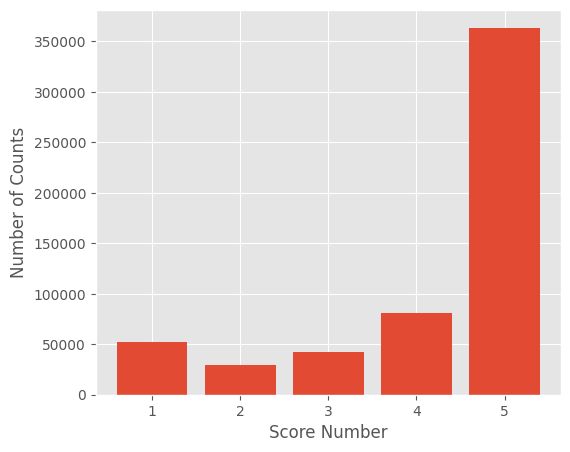

In [15]:
#calucuateing for the score counts
Score_counts =review_df["Score"].value_counts()
#calculating the total counts
total_counts=Score_counts.sum()
#Calucating the percentages
Score_percentages =(Score_counts/total_counts)*100
#Plottings
plt.figure(figsize =(6,5))
plt.bar(Score_counts.index, Score_counts.values)# use index and values to align data correctly
plt.xlabel("Score Number")
plt.ylabel("Number of Counts")
plt.show()

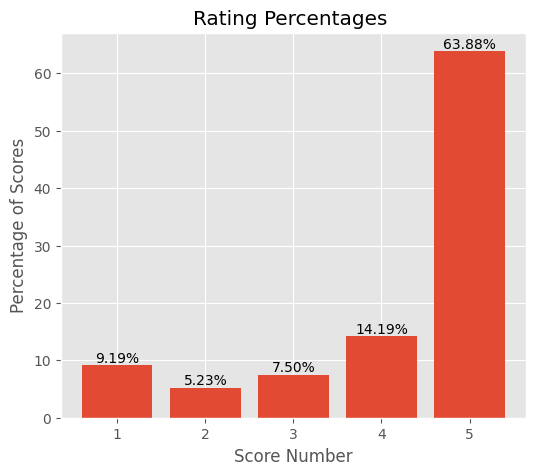

In [16]:
#plotting
plt.figure(figsize=(6,5))
bars=plt.bar(Score_percentages.index,Score_percentages.values)
#adding text labels 
for bar in bars:
    yval = bar.get_height()# get the height for the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha ="center",va="bottom")# position text
plt.xlabel("Score Number")
plt.ylabel("Percentage of Scores")
plt.title("Rating Percentages ")
plt.savefig("percentage_rating.png")
plt.show()

cleaning the Text reviews


In [17]:
#convert to lower case 
review_df["Text"]=review_df["Text"].str.lower()
review_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price. there was a wid...


In [18]:
#define a function clean the text 
def clean(text): 
#remove all special characters 
    text=re.sub("[^A-Za-z]+"," ",str(text))
    return text
#cleaning the text in the TExt column 
review_df["Text"]=review_df["Text"].apply(clean)
review_df

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price there was a wide ...
...,...,...
568449,5,great for sesame chicken this is a good if not...
568450,2,i m disappointed with the flavor the chocolate...
568451,5,these stars are small so you can give of those...
568452,5,these are the best treats for training and rew...


In [19]:
import nltk
nltk.download("punkt") #sentence tokenization

[nltk_data] Downloading package punkt to C:\Users\Michael
[nltk_data]     Haile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
review_df["sentences"]=review_df.Text.apply(lambda x: nltk.sent_tokenize(x))
review_df.head()

,Score,Text,sentences
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...


In [21]:
import nltk
#Tokenninzing the Text
review_df["Text_tok"]=review_df["Text"].apply(lambda x: nltk.sent_tokenize(x))
review_df.head()

,Score,Text,sentences,Text_tok
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...,[great taffy at a great price there was a wide...


In [22]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words("english")
stop_words

filtered_sent=[]
for w in review_df.sentences: 
    if w not in stop_words: 
        filtered_sent.append(w)
print("Tokenized Sentences: ", review_df.sentences)
print("Filtered Sentence:",filtered_sent)
review_df["filtered_sent"]=filtered_sent
review_df.head()

[nltk_data] Downloading package stopwords to C:\Users\Michael
[nltk_data]     Haile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,Score,Text,sentences,Text_tok,filtered_sent
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...,[i have bought several of the vitality canned ...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...,[product arrived labeled as jumbo salted peanu...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...,[this is a confection that has been around a f...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...,[if you are looking for the secret ingredient ...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...,[great taffy at a great price there was a wide...,[great taffy at a great price there was a wide...


In [23]:
#create a list of all sentences 

all_sentences = []
for o in range(len(review_df)):
    l = len(review_df.iloc[o]["filtered_sent"])
    for p in range(l):
        t = review_df.iloc[o]["filtered_sent"][p]
        all_sentences.append(t)   

In [24]:
#create a new dataframeabs
df_sentences = pd.DataFrame()
df_sentences["all_sentences"]=all_sentences

In [25]:
df_sentences

,all_sentences
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price there was a wide ...
...,...
568395,great for sesame chicken this is a good if not...
568396,i m disappointed with the flavor the chocolate...
568397,these stars are small so you can give of those...
568398,these are the best treats for training and rew...


In [26]:
df_sentences.isnull().values.any()

False

In [27]:
#create functions to obtain Polarity, values and label the Text based on the polarity 

def getPolarity(all_sentences): 
    return TextBlob(all_sentences).sentiment.polarity

#function to anlyze the all_sentences

def analysis(score): 
    if score < 0: 
        return "Negative"
    elif score == 0: 
        return "Neutral"
    else:
        return "Positive"
    

Apply The above funcitons

In [28]:
df_sentences["Polarity"]=df_sentences["all_sentences"].apply(getPolarity)
df_sentences["Sentiment"]=df_sentences["Polarity"].apply(analysis)

#remove Analysis that is Neutral 
df_sentences=df_sentences[df_sentences["Sentiment"]!="Neutral"]
df_sentences=df_sentences.loc[:,["all_sentences","Polarity","Sentiment"]]
df_sentences


,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568395,great for sesame chicken this is a good if not...,0.204167,Positive
568396,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568397,these stars are small so you can give of those...,-0.021875,Negative
568398,these are the best treats for training and rew...,0.521429,Positive


In [29]:
df_sentences["Sentiment"].value_counts()

Sentiment
Positive    503171
Negative     57440
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

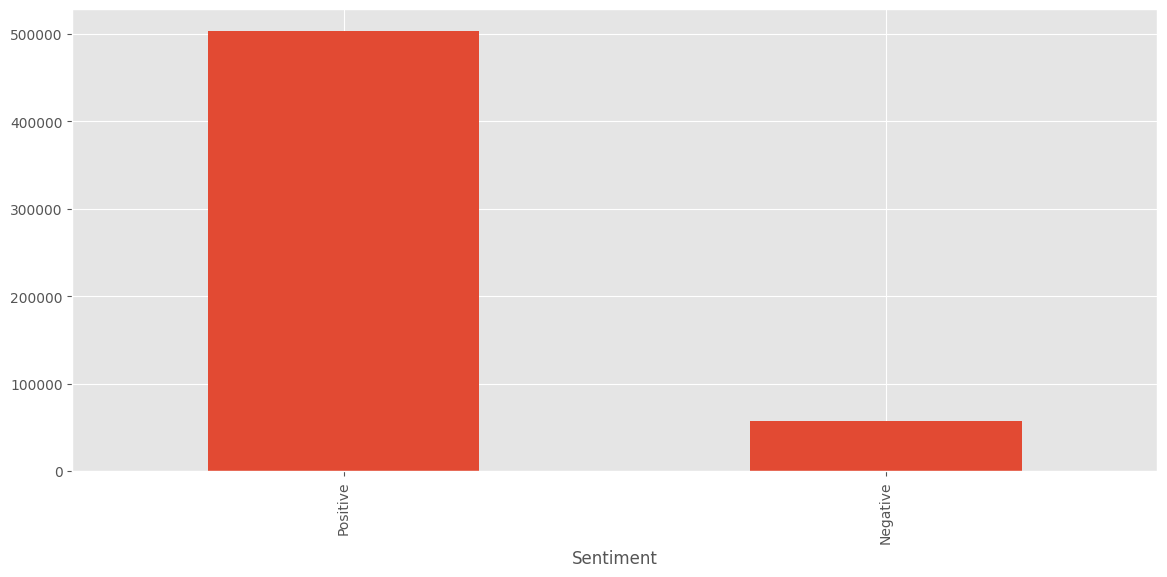

In [30]:
df_sentences["Sentiment"].value_counts().plot.bar()

In [31]:
Positive_Negative_Polarity = 100*df_sentences["Sentiment"].value_counts()/len(df_sentences)
Positive_Negative_Polarity

Sentiment
Positive    89.754036
Negative    10.245964
Name: count, dtype: float64

In [32]:
#removing stopwords and high/low frequency wordsabs
from nltk.corpus import stopwords
noise_words = []
eng_stop_words = stopwords.words("english")
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
#removing stop words 
stop_words = set(eng_stop_words)
without_stop_words=[]
stopword =[]
Text=review_df["Text"][0]
words = nltk.word_tokenize(Text)

for word in words:
    if word in stop_words: 
        stopword.append(word) 
    else:
        without_stop_words.append(word) 


In [34]:
print("-- Original sentence--\n", all_sentences[0])
print("\n--stopwords in the sentence--\n",stopword)
print("\n--non-stopwords in the sentences --\n",without_stop_words)

-- Original sentence--
 i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most

--stopwords in the sentence--
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

--non-stopwords in the sentences --
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


In [35]:
def stopwords_removal(stop_words, sentence): 
    return[word for word in nltk.word_tokenize(sentence) if word not in stop_words] 
review_df["Text_nonstop"]=review_df["Text"].apply(lambda row: stopwords_removal(stop_words, row))

review_df[["Text","Text_nonstop"]]

,Text,Text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wide ...,"[great, taffy, great, price, wide, assortment,..."
...,...,...
568449,great for sesame chicken this is a good if not...,"[great, sesame, chicken, good, better, restura..."
568450,i m disappointed with the flavor the chocolate...,"[disappointed, flavor, chocolate, notes, espec..."
568451,these stars are small so you can give of those...,"[stars, small, give, one, training, session, t..."
568452,these are the best treats for training and rew...,"[best, treats, training, rewarding, dog, good,..."


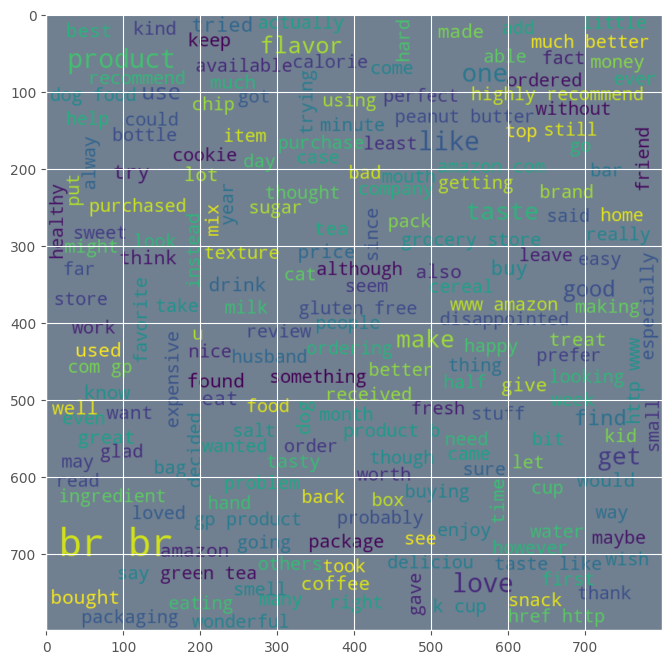

In [36]:
# Create wordcloud  to see most frequenty used words in all_sentences 

from nltk.corpus import stopwords
from wordcloud import WordCloud

stop_words = set(stopwords.words("english"))
textt = " ".join(review for review in df_sentences["all_sentences"])

wordcloud = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, background_color="slategray").generate(textt)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.savefig("wordcloud.png",dpi=150)
plt.show()


In [37]:
# from the above some popular words can be observed include love, good , taset, sugar..abs
#these words are mostly positive, indicating that most reviews in the dataset express a positive sentiment



# More Data Analysis


In [38]:
positive_sentiment = df_sentences[df_sentences["Sentiment"]=="Positive"]
negative_sentiment=df_sentences[df_sentences["Sentiment"]=="Negative"]
negative_sentiment.head(2)

,all_sentences,Polarity,Sentiment
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
14,the strawberry twizzlers are my guilty pleasur...,-0.500000,Negative


# WordCloud Positive Sentiment

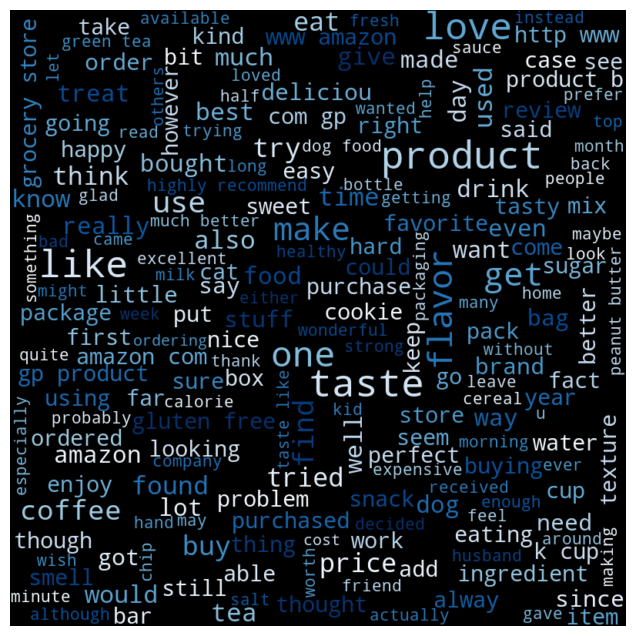

In [39]:
stop_words = set(stopwords.words("english"))
stop_words.update(["br", "href","good","great"]) # adding additinal words to stop_words 

# good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive_sentiment["all_sentences"])
wordcloud2 = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, colormap="Blues").generate(pos)
plt.figure(figsize = (10, 8)) 
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('positive_wordcloud.png',dpi=150 )
plt.show()

in the above the positive sentiment word cloud shows words such as taste, thought, better, flavor
product, like, love, 

# wordcloud -Negative sentiment

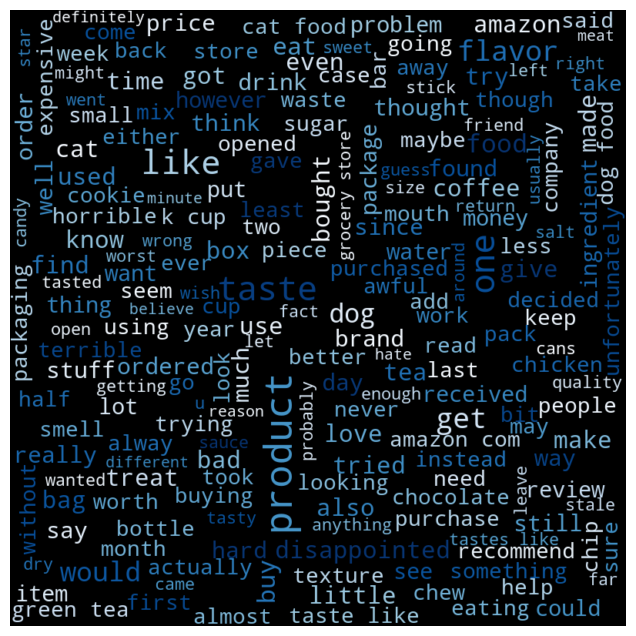

In [41]:
neg = " ".join(review for review in negative_sentiment["all_sentences"])
wordcloud3 = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, colormap="Blues").generate(neg)
plt.figure(figsize = (10,8)) 
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('negative_wordcloud.png', dpi=150)
plt.show()

# Data Modeling

In [42]:
df_sentences

,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568395,great for sesame chicken this is a good if not...,0.204167,Positive
568396,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568397,these stars are small so you can give of those...,-0.021875,Negative
568398,these are the best treats for training and rew...,0.521429,Positive


In [43]:
df_sentences=df_sentences.drop_duplicates(keep="first")
df_sentences

,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568395,great for sesame chicken this is a good if not...,0.204167,Positive
568396,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568397,these stars are small so you can give of those...,-0.021875,Negative
568398,these are the best treats for training and rew...,0.521429,Positive


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df_sentences.all_sentences)
y = df_sentences.Sentiment

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [52]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((310120, 109687), (77531, 109687), (310120,), (77531,))

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver="saga", multi_class="auto")))
models.append(("MNB", MultinomialNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(("MLP", MLPClassifier(hidden_layer_sizes=(10, ), activation="relu", random_state=0)))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot

# Calculate mean scores for each algorithm if 'results' is a list of lists
mean_scores = [np.mean(r) for r in results]

positions = range(len(names))

pyplot.bar(positions, mean to_scores, tick_label=names)
pyplot.title('Algorithm Comparison')
pyplot.ylabel('Average Scores')
pyplot.show()
